# VTRH SURGICAL CAMP ANALYSIS FOR THE MONTH OF JULY 2025

## From 8th to 13th June 2025, the County Government of Vihiga, in collaboration with Operation International, brought life-changing medical care to the community through a week-long Surgical Camp. This initiative not only provided vital health services but also served as a platform for exchanging medical skills and expertise between local and international teams.

In [185]:
#Import all the libraries
import pandas as pd
import sqlalchemy as sql
import sqlite3 as sqlite
import numpy as np
from wordcloud import WordCloud
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#install ipython -sql for magic command
!pip install SQLAlchemy==1.4.49



In [3]:
# connect with external sql
%load_ext sql


In [176]:
#load the file for the surgical camp data captured from surgical files
df=pd.read_excel(r"C:\Users\user\OneDrive\Desktop\SURGICAL CAMP 20225.xlsx")

In [177]:
#the dataset has four unique values for sex due to trailing spaces
#(array(['F', 'M', 'M ', 'F '], dtype=object))
df['SEX'].unique()
#remove the leading and trailing spaces
df['SEX']=df['SEX'].str.strip()
df['PLACE']=df['PLACE'].str.strip()

In [6]:
#from os import replace
#create sql engine connection
from sqlalchemy import create_engine

engine=create_engine('sqlite:///SURGICAL_CAMP.db')

#load the excel into sql file
df.to_sql('camp_data',con=engine,if_exists='replace',index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_33364\4185552275.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df.to_sql('camp_data',con=engine,if_exists='replace',index=False)


AttributeError: 'Engine' object has no attribute 'cursor'

In [7]:
#connect to the database
%load_ext sql
%sql sqlite:///SURGICAL_CAMP.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @SURGICAL_CAMP.db'

In [8]:
# set sql table display manually
%config SqlMagic.style='PLAIN_COLUMNS'

In [200]:
#load the dataset
df.head(10).drop(columns='OP NO')

,NO,SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS,AgeGroup
0,1,F,54.0,EPIGASTRIC HERNIA,VIHIGA,EPIGASTRIC FULLNESS SWELLING,NaN,NaN,NaN,50-54
1,2,F,50.0,LIPOMA,EMUHAYA,NaN,LIPOMA EXCISION,NaN,NaN,50-54
2,3,F,49.0,LIPOMA,BUSAMU,SWELLING ON FORE HEAD,LIPOMA EXCISION,NaN,NaN,45-49
3,4,M,50.0,INGUINAL SCROTAL HERNIA,EMUHAYA,PENILE AND SCRATAL SWELLING,HERNIORRHAPHY,NaN,NaN,50-54
4,5,M,73.0,LEFT EYE APHALCIA,EMUHAYA,POOR VISION,NaN,NaN,NaN,70-74
5,8,F,52.0,LIPOMA,SABATIA,REGIONAL SWELLING,LIPOMA EXCISION,NaN,NaN,50-54
6,9,F,87.0,LIPOMA,EMANGARE,NaN,LIPOMA EXCISION,NaN,PROCEDURE NOT DONE,85-89
7,10,M,3.0,OBSTRUCTIVE SLEEP APNIA,KAPTEL,NaN,NaN,NaN,NaN,0-4
8,11,F,23.0,KELLOIDS,SABATIA,NaN,KELLOID EXCISION,NaN,NaN,20-24
9,12,F,61.0,EPIGASTRIC HERNIA,EBUYANGU,NaN,NaN,NaN,PROCEDURE NOT DONE,60-64


In [9]:
#load the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OP NO      202 non-null    float64
 1   NO         229 non-null    int64  
 2   SEX        229 non-null    object 
 3   AGE        222 non-null    float64
 4   DX         228 non-null    object 
 5   PLACE      204 non-null    object 
 6   SYMPTOMS   154 non-null    object 
 7   PROCEDURE  205 non-null    object 
 8   PMHX       11 non-null     object 
 9   REMARKS    36 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 18.0+ KB


In [105]:
#There are null values in AGE we will impute them with mode

df['AGE']=df['AGE'].fillna(df['AGE'].mode()[0])


In [106]:
#get the data description for age and sex of the patients
#it is interesting to note that the minimum age captured was 1 year
df[['AGE','SEX']].describe(include='all')

,AGE,SEX
count,229.000000,229
unique,NaN,5
top,NaN,F
freq,NaN,116
mean,46.253275,NaN
std,21.364148,NaN
min,1.000000,NaN
25%,35.000000,NaN
50%,49.000000,NaN
75%,62.000000,NaN


In [178]:
#the dataset has four unique values for sex due to trailing spaces
#(array(['F', 'M', 'M ', 'F '], dtype=object))
df['SEX'].unique()
#remove the leading and trailing spaces
#df['SEX']=df['SEX'].str.strip()

array(['F', 'M'], dtype=object)

In [108]:
%%sql
--data for patients below 5 years and their conditions

SELECT AGE,SEX,DX,PROCEDURE,REMARKS
FROM camp_data
WHERE AGE < 5;

 * sqlite:///SURGICAL_CAMP.db
Done.


AGE,SEX,DX,PROCEDURE,REMARKS
3.0,M,OBSTRUCTIVE SLEEP APNIA,None,None
2.0,F,UMBILICAL HERNIA,UMBILICAL HERNIA REPAIR,None
2.0,F,UMBILICAL HERNIA,UMBILICAL HERNIA REPAIR,None
2.0,F,UMBILICAL HERNIA,UMBILICAL HERNIA REPAIR,None
1.0,M,ADENOTONSILITIS,ADENOTONSILLECTOMY,None
2.0,M,ADENOIDS HYPERTROPHY,ADENOIDECTOMY,None
2.0,F,UMBLICAL HERNIA,UMBILICAL HERNIA REPAIR,None
2.0,F,UMBLICAL HERNIA,UMBILICAL HERNIA REPAIR,None
1.0,M,SUPRA-UMBILICAL HERNIA,SUPRA-UMBILICAL HERNIA REPAIR,None
4.0,M,ADENOIDS HYPERTROPHY,ADENOTONSILLECTOMY,None


### From the data collected in the files children under 5 comprised of 5% of the total attendance.The least age being 1 year olds.The most prevalent conditions being umbilical hernia.

In [109]:
%%sql
--patients below 5 years ranked by procedure done

SELECT AGE,SEX,DX,PROCEDURE,REMARKS,
RANK() OVER (ORDER BY PROCEDURE) AS rank_by_procedure
FROM camp_data
WHERE AGE < 5;


 * sqlite:///SURGICAL_CAMP.db
Done.


AGE,SEX,DX,PROCEDURE,REMARKS,rank_by_procedure
3.0,M,OBSTRUCTIVE SLEEP APNIA,None,None,1
2.0,M,ADENOIDS HYPERTROPHY,ADENOIDECTOMY,None,2
1.0,M,ADENOTONSILITIS,ADENOTONSILLECTOMY,None,3
4.0,M,ADENOIDS HYPERTROPHY,ADENOTONSILLECTOMY,None,3
4.0,M,LEFT INGUINAL HERNIA,LEFT INGUINAL HERNIA REPAIR,None,5
1.0,M,SUPRA-UMBILICAL HERNIA,SUPRA-UMBILICAL HERNIA REPAIR,None,6
2.0,F,UMBILICAL HERNIA,UMBILICAL HERNIA REPAIR,None,7
2.0,F,UMBILICAL HERNIA,UMBILICAL HERNIA REPAIR,None,7
2.0,F,UMBILICAL HERNIA,UMBILICAL HERNIA REPAIR,None,7
2.0,F,UMBLICAL HERNIA,UMBILICAL HERNIA REPAIR,None,7


### The procedures done to the under 5 years were by far umbilical hernia repair,with one case that was not done a procedure since it was Obstructive sleep apnea

In [199]:
%%sql
--patients who were not done any procedure and their condition 

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data 
WHERE REMARKS LIKE 'PROCEDURE NOT DONE';

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,87.0,LIPOMA,EMANGARE,None,LIPOMA EXCISION,None,PROCEDURE NOT DONE
F,61.0,EPIGASTRIC HERNIA,EBUYANGU,None,None,None,PROCEDURE NOT DONE
M,72.0,HERNIA,SABATIA,None,None,None,PROCEDURE NOT DONE
M,57.0,SHOULDER LIPOMA/ PERIPHERAL NEUROPATHY,MAGUI,None,None,None,PROCEDURE NOT DONE
M,62.0,LIPOMA,MUHANDA,SWELLING ON THE CHEEK,None,None,PROCEDURE NOT DONE
F,47.0,LIPOMA,BUKULUNYA,PERINEUM SWELLING,None,None,PROCEDURE NOT DONE
F,32.0,EPIGASTRIC HERNIA,CHAVAKALI,None,None,None,PROCEDURE NOT DONE
M,7.0,LEFT INGUINO SCROTAL HERNIA,HAMISI,None,None,None,PROCEDURE NOT DONE
F,59.0,BREAST MASS,ENDELI,PAIN,None,None,PROCEDURE NOT DONE
M,42.0,UPPER LIP MASS,SABATIA,LIP SWELLING,None,None,PROCEDURE NOT DONE


### A total of 4% of the patients did not undergoe a procedure due to one reason or the other,while some cases like lipoma and mass was arguable a matter of minor sugery which can be done in the facility and not necessarily surgical camp

In [111]:
%%sql
--the number of patient by area of residence

SELECT AGE ,TRIM(PLACE),COUNT((TRIM(PLACE))) FREQUENCY
FROM camp_data
GROUP BY TRIM(PLACE)
ORDER BY FREQUENCY DESC;


 * sqlite:///SURGICAL_CAMP.db
Done.


AGE,TRIM(PLACE),FREQUENCY
52.0,SABATIA,14
50.0,EMUHAYA,13
54.0,VIHIGA,10
25.0,MBALE,7
47.0,HAMISI,7
52.0,NANDI,4
67.0,MBIHI,4
53.0,KIGAMA,4
71.0,VIYALO,3
65.0,TAMBUA,3


### Capturing the data for residence proved a challenge since there was no ,some captured vilages,sublocations which is hectic trying to figure out the subcounties.However vihiga subcounty led with the hisghest number of attendance followed by Emuhaya.A good number of the attendance were also from neighboring counties.Highlighting the willingness of people to seek services despite the distance.

In [112]:
%%sql

SELECT *
FROM camp_data
WHERE PLACE LIKE 'None';

 * sqlite:///SURGICAL_CAMP.db
Done.


OP NO,NO,SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS


In [113]:
%%sql

SELECT count(SELECT DX 
             FROM camp_data
            WHERE DX LIKE '%HERNIA%')
FROM camp_data
;

 * sqlite:///SURGICAL_CAMP.db
(sqlite3.OperationalError) near "SELECT": syntax error
[SQL: SELECT count(SELECT DX 
             FROM camp_data
            WHERE DX LIKE '%HERNIA%')
FROM camp_data
;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [159]:
%%sql

--number of patients by gender

SELECT TRIM(SEX) as Gender,COUNT(SEX) AS Patients
FROM camp_data
GROUP BY TRIM(SEX);

 * sqlite:///SURGICAL_CAMP.db
Done.


Gender,Patients
F,101
M,97


### Of the patients attendance 44% were females and 42% males.Quite an impressive attendance by males in health seeking which is usually the contrary.

In [198]:
%%sql
--a count of all patients that a procedure was done

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE PROCEDURE	IS NOT NULL;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,50.0,LIPOMA,EMUHAYA,None,LIPOMA EXCISION,None,None
F,49.0,LIPOMA,BUSAMU,SWELLING ON FORE HEAD,LIPOMA EXCISION,None,None
M,50.0,INGUINAL SCROTAL HERNIA,EMUHAYA,PENILE AND SCRATAL SWELLING,HERNIORRHAPHY,None,None
F,52.0,LIPOMA,SABATIA,REGIONAL SWELLING,LIPOMA EXCISION,None,None
F,87.0,LIPOMA,EMANGARE,None,LIPOMA EXCISION,None,PROCEDURE NOT DONE
F,23.0,KELLOIDS,SABATIA,None,KELLOID EXCISION,None,None
M,22.0,KELLOIDS,BANJA,SOLID KELLOID ON THE CHEST,KELLOID EXCISION,None,None
M,20.0,LIPOMA,VIHIGA,NECK SWELLING,LIPOMA EXCISION,None,None
F,25.0,KELLOIDS,MBALE,EAR SWELLING,KELLOID EXCISION,None,None
F,56.0,LIPOMA,MADIRA,NECK SWELLING,LIPOMA EXCISION,None,None


In [116]:
%%sql
--a count of all patients that a procedure was done

SELECT COUNT(PROCEDURE)
FROM camp_data
WHERE PROCEDURE	IS NOT NULL;

 * sqlite:///SURGICAL_CAMP.db
Done.


COUNT(PROCEDURE)
175


### From the total number of 229 a total of 76% of patients underwent a surgical procedure

In [197]:
%%sql 

--all excisions done

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE PROCEDURE LIKE '%__EXC__%'
;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,50.0,LIPOMA,EMUHAYA,None,LIPOMA EXCISION,None,None
F,49.0,LIPOMA,BUSAMU,SWELLING ON FORE HEAD,LIPOMA EXCISION,None,None
F,52.0,LIPOMA,SABATIA,REGIONAL SWELLING,LIPOMA EXCISION,None,None
F,87.0,LIPOMA,EMANGARE,None,LIPOMA EXCISION,None,PROCEDURE NOT DONE
F,23.0,KELLOIDS,SABATIA,None,KELLOID EXCISION,None,None
M,22.0,KELLOIDS,BANJA,SOLID KELLOID ON THE CHEST,KELLOID EXCISION,None,None
M,20.0,LIPOMA,VIHIGA,NECK SWELLING,LIPOMA EXCISION,None,None
F,25.0,KELLOIDS,MBALE,EAR SWELLING,KELLOID EXCISION,None,None
F,56.0,LIPOMA,MADIRA,NECK SWELLING,LIPOMA EXCISION,None,None
F,44.0,LIPOMA,MASANA,SWELLNG OF CHEST WALL,LIPOMA EXCISION,None,None


In [118]:
%%sql 
--Excisions done categorized by gender

SELECT UPPER(TRIM(SEX)) as Gender, COUNT(TRIM(SEX)) AS Excisions_done
FROM camp_data
WHERE PROCEDURE LIKE '%EXCISION%'
GROUP BY SEX;

 * sqlite:///SURGICAL_CAMP.db
Done.


Gender,Excisions_done
F,46
M,32
M,2


### From the surgical procedures done a 35% were excision cases.With males and females accounting for 56% and 43% respectively

In [196]:
%%sql 
--all patients that their residence was not captured

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE PLACE ISNULL;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
M,70.0,LIPOMA,None,SWELLING OF THE ARMPIT,LIPOMA EXCISION,None,None
M,49.0,HERNIA,None,None,R. INGUAL HERNIA REPIAR,None,None
M,73.0,RIGHT FACIAL MASS,None,ENLARGING RIGHT FACIAL MASS,PAROTIDECTOMY,HTN,None
M,66.0,RIGHT INGUAL SCROTAL HERNIA/ EPIDIDYMIS CYST,None,None,REPAIR OF RIGHT INGUAL SCROTAL HERNIA/ EXCISION OF RIGHT EPIDIDYMIS CYST,None,None
M,62.0,PEDUNCULATED NASAL MASS,None,BENIGN SKIN LESION,EXCISION,None,None
M,None,LIPOMA OF THE POSTERIOR NECK,None,NECK SWELLING,EXCISION,None,None
M,None,LIPOMA,None,SWELLING OF THE ARMPIT,LIPOMA EXCISION,None,None
M,None,FOREHEAD LIPOMA,None,SWELLING OF THE HEAD,LIPOMA EXCISION,None,None
M,59.0,RIGHT INGUAL HERNIA,None,None,SURGICAL REPAIR,None,None
M,45.0,R. INGUAL HERNIA,None,None,HERNIA REPAIR,None,None


In [195]:
%%sql 

--all excisions done

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%LIPOMA%'

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,50.0,LIPOMA,EMUHAYA,None,LIPOMA EXCISION,None,None
F,49.0,LIPOMA,BUSAMU,SWELLING ON FORE HEAD,LIPOMA EXCISION,None,None
F,52.0,LIPOMA,SABATIA,REGIONAL SWELLING,LIPOMA EXCISION,None,None
F,87.0,LIPOMA,EMANGARE,None,LIPOMA EXCISION,None,PROCEDURE NOT DONE
F,40.0,LIPOMA,KEGOYE,None,None,None,None
M,20.0,LIPOMA,VIHIGA,NECK SWELLING,LIPOMA EXCISION,None,None
M,71.0,LIPOMA,BUSALI,None,None,None,PROSIGURE NOT DONE
F,56.0,LIPOMA,MADIRA,NECK SWELLING,LIPOMA EXCISION,None,None
F,44.0,LIPOMA,MASANA,SWELLNG OF CHEST WALL,LIPOMA EXCISION,None,None
F,60.0,LIPOMA,SABATIA,SWELLING ON THE EYEBROW,LIPOMA EXCISION,None,None


In [194]:
%%sql 
--all cases of keloids

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%KE__%'
;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,23.0,KELLOIDS,SABATIA,None,KELLOID EXCISION,None,None
M,22.0,KELLOIDS,BANJA,SOLID KELLOID ON THE CHEST,KELLOID EXCISION,None,None
F,25.0,KELLOIDS,MBALE,EAR SWELLING,KELLOID EXCISION,None,None
F,29.0,KELLOIDS,MUKULI,None,RIGHT EARLOBE KELLOID,None,None
F,32.0,KELLOIDS,MBALE,None,KELLOID EXCISION,None,None
F,44.0,EAR KELLOID,INGIDI,EAR LOBE,None,None,None
M,35.0,SCALP AND FACE KELLOID,KURESOI,None,KELLOID RESECTION/ HYDROCORTISOL INJECTION,None,None


### From the total cases keloids accounted for 3% of the cases.

In [193]:

%%sql 
--all cases of hernia

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%HER__%'

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,54.0,EPIGASTRIC HERNIA,VIHIGA,EPIGASTRIC FULLNESS SWELLING,None,None,None
M,50.0,INGUINAL SCROTAL HERNIA,EMUHAYA,PENILE AND SCRATAL SWELLING,HERNIORRHAPHY,None,None
F,61.0,EPIGASTRIC HERNIA,EBUYANGU,None,None,None,PROCEDURE NOT DONE
F,56.0,HERNIA,EMUHAYA,ABDOMINAL SWELLING,HERNIORRHAPHY,None,None
M,47.0,EPIGASTRIC HERNIA,HAMISI,None,EPIGASTRIC HERNIA REPAIR,None,None
F,67.0,HERNIA,MBIHI,ABDOMINAL MASS,HERNIORRHAPHY,None,None
F,40.0,EPIGASTRIC/UMBILICAL HERNIA,ESKOTE,PARAUMBILICAL SWELLING,HERNIORRHAPHY,None,None
M,89.0,HERNIA/HYDROCELE,MBALE,SCROTAL SWELLING,HERNIORRHAPHY/HYDROCELECTOMY,None,None
F,79.0,HERNIA,SABATIA,None,HERNIAPLASTY,None,None
M,67.0,HERNIA,MUSIKULU,SWELLING OF THE NAVEL,HERNIORRHAPHY,None,None


Python analysis

In [121]:
%%sql 
--all cases of hernia

SELECT COUNT(dx) AS `number of hernias`
FROM camp_data
WHERE DX LIKE '%HER__%'

;

 * sqlite:///SURGICAL_CAMP.db
Done.


number of hernias
62


### From the total cases hernia accounted for 27% of the cases,with 31% females and 69% males.From the observations males seems to be the most suffering from hernia across all age sets,except for under 5 years .

In [192]:
%%sql 
--all cases of hernia ordered by sex of the patient

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%HER__%'
ORDER BY sex

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,54.0,EPIGASTRIC HERNIA,VIHIGA,EPIGASTRIC FULLNESS SWELLING,None,None,None
F,61.0,EPIGASTRIC HERNIA,EBUYANGU,None,None,None,PROCEDURE NOT DONE
F,56.0,HERNIA,EMUHAYA,ABDOMINAL SWELLING,HERNIORRHAPHY,None,None
F,67.0,HERNIA,MBIHI,ABDOMINAL MASS,HERNIORRHAPHY,None,None
F,40.0,EPIGASTRIC/UMBILICAL HERNIA,ESKOTE,PARAUMBILICAL SWELLING,HERNIORRHAPHY,None,None
F,79.0,HERNIA,SABATIA,None,HERNIAPLASTY,None,None
F,2.0,UMBILICAL HERNIA,None,None,UMBILICAL HERNIA REPAIR,None,None
F,2.0,UMBILICAL HERNIA,None,None,UMBILICAL HERNIA REPAIR,None,None
F,2.0,UMBILICAL HERNIA,None,None,UMBILICAL HERNIA REPAIR,None,None
F,49.0,EPIGASTRIC HERNIA/ LIPOMA,NANDI,None,LIPOMA EXCISION,None,None


In [123]:
%%sql 
--all cases of hernia ordered by sex of the patient

SELECT SEX,COUNT(sex)
FROM camp_data
WHERE DX LIKE '%HER__%'
GROUP  BY sex

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,COUNT(sex)
F,19
M,43


In [191]:
%%sql 
--all cases of hernia ordered by sex of the patient and ages below 5 years

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%HER__%' AND age <5
ORDER BY sex 

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,2.0,UMBILICAL HERNIA,None,None,UMBILICAL HERNIA REPAIR,None,None
F,2.0,UMBILICAL HERNIA,None,None,UMBILICAL HERNIA REPAIR,None,None
F,2.0,UMBILICAL HERNIA,None,None,UMBILICAL HERNIA REPAIR,None,None
F,2.0,UMBLICAL HERNIA,VIYALO,PAIN AND SWELLING IN UMBLICAL,UMBILICAL HERNIA REPAIR,None,None
F,2.0,UMBLICAL HERNIA,VIYALO,PAIN AND SWELLING IN UMBLICAL,UMBILICAL HERNIA REPAIR,None,None
M,1.0,SUPRA-UMBILICAL HERNIA,HAMISI,LUMP NEAR THE UMBILICAL,SUPRA-UMBILICAL HERNIA REPAIR,None,None
M,4.0,LEFT INGUINAL HERNIA,LIADUYWA,None,LEFT INGUINAL HERNIA REPAIR,None,None


In [190]:
%%sql 
--all cases of hernia ordered by sex of the patient and ages between  5 to 20 years

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%HER__%' AND age BETWEEN 5 AND 20
ORDER BY sex 

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,10.0,UMBILICAL HERNIA,KISUMU,None,UMBILICAL HERNIA REPAIR,None,None
M,20.0,HERNIA,None,None,HERNIA REPAIR,None,None
M,9.0,UMBLICAL HERNIA,LURAMBI,None,UMBILICAL HERNIA REPAIR,None,None
M,7.0,LEFT INGUINO SCROTAL HERNIA,HAMISI,None,None,None,PROCEDURE NOT DONE
M,8.0,RIGHT INGUINAL HERNIA,IDUKU,None,RIGHT INGUINAL HERNIORRECTOMY,None,None
M,20.0,LEFT INGUINAL HERNIA,KIGAMA,None,HERNIORRHAPHY,None,None


Inguinal hernia was the most prevalent in males aged 5 to 20 years,with 1 case of inguino scrotal hernia at age 7 

In [126]:
%%sql 
--all cases of hernia ordered by sex of the patient and ages between  5 to 20 years

SELECT sex,COUNT(DX)
FROM camp_data
WHERE DX LIKE '%HER__%' AND age BETWEEN 5 AND 20
GROUP BY sex 

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,COUNT(DX)
F,1
M,5


In [189]:
%%sql 
--all cases of hernia ordered by sex of the patient and ages between  20 to 45 years

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%HER__%' AND age BETWEEN 20 AND 45
ORDER BY sex 

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,40.0,EPIGASTRIC/UMBILICAL HERNIA,ESKOTE,PARAUMBILICAL SWELLING,HERNIORRHAPHY,None,None
F,32.0,EPIGASTRIC HERNIA,CHAVAKALI,None,None,None,PROCEDURE NOT DONE
F,40.0,SUPRA-UMBILICAL HERNIA,SABATIA,"NAUSEA, PAIN",HERNIORRHAPHY,None,None
F,35.0,SUPRA-UMBILICAL HERNIA,EBUNAGWE,UMBILICAL SWELLING,HERNIORRAPHY,None,None
F,36.0,PARAUMBILICAL HERNIA,NYABONDO,None,HERNIOPLASTY,None,None
M,45.0,R. INGUAL HERNIA,None,None,HERNIA REPAIR,None,None
M,20.0,HERNIA,None,None,HERNIA REPAIR,None,None
M,39.0,RIGHT INGUAL SCROTAL HERNIA,KILINGILI,None,RIGHT INGUAL HERNIA REPAIR,None,None
M,35.0,INGUINAL HERNIA,EMUTSURU,None,INGUINAL HERNIA REPAIR,None,None
M,45.0,INGUINO SCROTAL HERNIA/ EPIDIDO-ORCHITIS,MBIHI,RIGHT INGUINAL SCROTAL SWELLING,REGIONAL HERNIORRHAPHY,None,None


again it is quite evident that hernia is prevalent in males than females.with inguinal hernia affecting more males than females.while umbilical hernia being more prevalent in females.

In [128]:
%%sql 
--all cases of hernia ordered by sex of the patient and ages between  20 to 45 years

SELECT sex,COUNT(dx)
FROM camp_data
WHERE DX LIKE '%HER__%' AND age BETWEEN 20 AND 45
GROUP BY sex 

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,COUNT(dx)
F,5
M,11


In [188]:
%%sql 
--all cases of hernia ordered by sex of the patient and ages above 45 years

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%HER__%' AND age > 45
ORDER BY sex 

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,54.0,EPIGASTRIC HERNIA,VIHIGA,EPIGASTRIC FULLNESS SWELLING,None,None,None
F,61.0,EPIGASTRIC HERNIA,EBUYANGU,None,None,None,PROCEDURE NOT DONE
F,56.0,HERNIA,EMUHAYA,ABDOMINAL SWELLING,HERNIORRHAPHY,None,None
F,67.0,HERNIA,MBIHI,ABDOMINAL MASS,HERNIORRHAPHY,None,None
F,79.0,HERNIA,SABATIA,None,HERNIAPLASTY,None,None
F,49.0,EPIGASTRIC HERNIA/ LIPOMA,NANDI,None,LIPOMA EXCISION,None,None
F,50.0,LARGE SUPRA UMBILICAL HERNIA/RIGHT BREAST MASS,MATUNGU,None,SUPRA-UMBILICAL HERNIA REPAIR,None,None
F,53.0,SUPRA-UMBILICAL HERNIA,MALAVA,ABDOMINAL PAIN,OPEN REPAIR OF SUPRA UMBILICAL HERNIA WITH SUTURE,None,None
M,50.0,INGUINAL SCROTAL HERNIA,EMUHAYA,PENILE AND SCRATAL SWELLING,HERNIORRHAPHY,None,None
M,47.0,EPIGASTRIC HERNIA,HAMISI,None,EPIGASTRIC HERNIA REPAIR,None,None


for ages above 45 years ,Epigastric hernia seems to be cropping up ,however inguinal hernia is still the leading case in male patients

In [130]:
%%sql 
--all cases of hernia ordered by sex of the patient and ages above 45 years

SELECT sex,COUNT(dx)
FROM camp_data
WHERE DX LIKE '%HER__%' AND age > 45
GROUP BY sex 

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,COUNT(dx)
F,8
M,26


In [156]:
%%sql 
--all cases of mass  ordered by sex of the patient

SELECT SEX ,COUNT(SEX)
FROM camp_data
WHERE DX LIKE '%MASS%'
GROUP BY SEX
;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,COUNT(SEX)
F,20
M,7


In [187]:
%%sql 
--all cases of mass  ordered by sex of the patient

SELECT SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS	
FROM camp_data
WHERE DX LIKE '%MASS%'

;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS
F,50.0,REGIONAL MASS,KISUMU,NECK SWELLING,EXCISION,None,None
M,17.0,CYSTIC MASS,EMUHAYA,RIGHT AXILLIARY REGIONAL SWELLING,EXCISION,None,None
F,52.0,PEDUNCULATED SCALP MASS,NANDI,SCALP MASS,EXCISION,None,None
F,53.0,REGIONAL MASS LIPOMA,DEMESI,THIGH SWELLING,EXCISION,None,None
M,73.0,RIGHT FACIAL MASS,None,ENLARGING RIGHT FACIAL MASS,PAROTIDECTOMY,HTN,None
M,62.0,PEDUNCULATED NASAL MASS,None,BENIGN SKIN LESION,EXCISION,None,None
F,17.0,BREAST MASS,None,None,LEFT FIBRODEOMA,None,None
F,48.0,BREAST MASS,None,None,BREAST EXSION BIOPSY,HTN,None
F,35.0,BACK MASS,None,None,EXCISION,None,None
F,None,SOFT TISSUE MASS,None,"FOREHEAD,CHEST,BACK AND FOOT SWELLING",LIPOMA EXCISION,None,None


In [131]:
#fill the blank outpatient number with 0
df['OP NO']=df['OP NO'].fillna(0)

In [132]:
#fill the blank ages with the mode
mode_age=df['AGE'].mode()[0]
df['AGE']=df['AGE'].fillna(mode_age)


In [ ]:
df

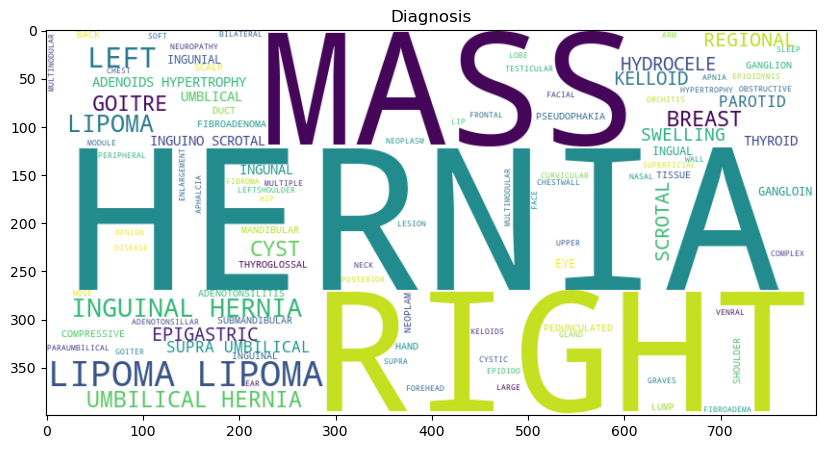

In [136]:
#create a wordcloud for diagnosis
text=' '.join(df['DX'].dropna().astype(str))
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
#plt.axis(off)
plt.title('Diagnosis')
plt.show()
          


           
           

### From the wordcloud it is true indeed that "hernia "was the leading case in the patients that attended the surgical camp,and going deeprt the right anatomical site."Mass" also came out strongly as another common condition.Interestingly there was 1 case of Graves disease

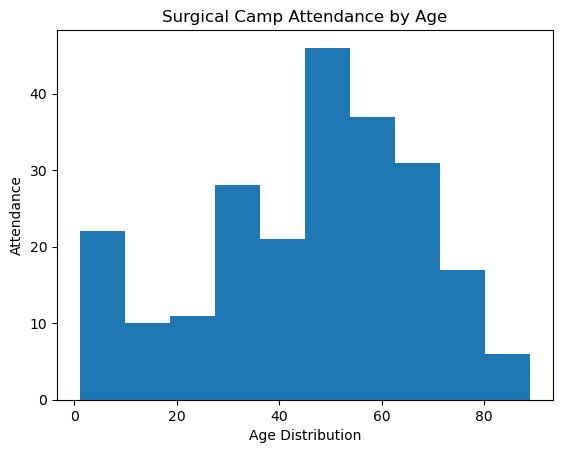

In [137]:
#histogram for age attendance
plt.hist(df['AGE'])
plt.xlabel("Age Distribution")
plt.ylabel("Attendance")
plt.title("Surgical Camp Attendance by Age"); 

It is of concern to find out what cases were prevalence to patients below 20 years

In [138]:
%%sql
--all cases for patients below 20 years

SELECT DISTINCT DX as 'Diagnosis for ages <20yrs'
FROM camp_data
WHERE AGE <20;

 * sqlite:///SURGICAL_CAMP.db
Done.


Diagnosis for ages <20yrs
OBSTRUCTIVE SLEEP APNIA
LIPOMA
CYSTIC MASS
UMBILICAL HERNIA
RIGHT HYDROCELE
BREAST MASS
ADENOTONSILITIS
THYROGLOSSAL DUCT CYST
ADENOIDS HYPERTROPHY
UMBLICAL HERNIA


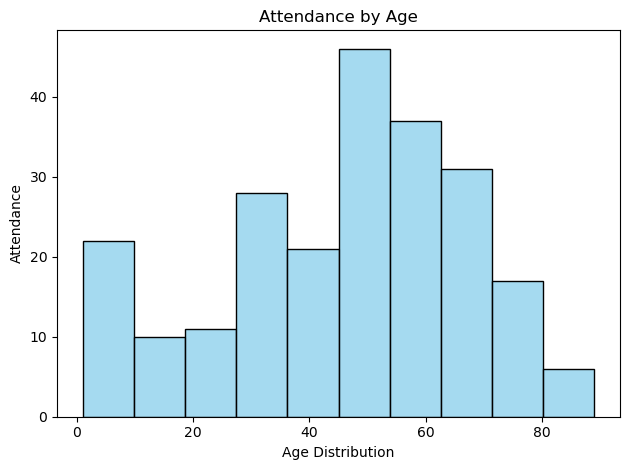

In [139]:
#histogram by use of seaborn
sns.histplot(data=df,x='AGE',bins=10,kde=False,color='skyblue',edgecolor='black')
plt.xlabel('Age Distribution')
plt.ylabel('Attendance')
plt.title('Attendance by Age')
plt.tight_layout()
             

### from the histogram the frequent ages that attended the camp increased with ages

In [33]:
#import data from surgical diary
#surg_diary=pd.read_excel(r"C:\Users\user\OneDrive\Desktop\surgical diary.xlsx")
#surg_diary

In [ ]:
#drop columns "unnamed
#pd.drop(columns=surg_diary[['Unnamed: 0','Unnamed: 2','Unnamed: 4','Unnamed: 6','Unnamed: 8	',]]

In [181]:
%%sql

--diagnosis versus the place of residence

SELECT PLACE,DX
FROM camp_data
GROUP BY PLACE;


 * sqlite:///SURGICAL_CAMP.db
Done.


PLACE,DX
None,LIPOMA
BANJA,KELLOIDS
BUDAYWA,RIGHT INGUINAL HERNIA
BUGINA,LIPOMA
BUKUGA,LIPOMA
BUKULUNYA,LIPOMA
BUSALI,LIPOMA
BUSAMO,REGIONAL LIPOMA
BUSAMU,LIPOMA
BUTULA,GANGLOIN CYST


In [35]:
%%sql
SELECT SEX,DX
FROM camp_data
GROUP BY SEX;

 * sqlite:///SURGICAL_CAMP.db
Done.


SEX,DX
F,EPIGASTRIC HERNIA
F,LIPOMA
M,INGUINAL SCROTAL HERNIA
M,LIPOMA


In [36]:
%%sql

SELECT *
FROM camp_data
WHERE DX LIKE '%_GRAVE_%';

 * sqlite:///SURGICAL_CAMP.db
Done.


OP NO,NO,SEX,AGE,DX,PLACE,SYMPTOMS,PROCEDURE,PMHX,REMARKS


In [37]:
# correlation between keloid and age
correlation=(df['AGE'].corr(df['DX']=='KELLOIDS')).astype(int)
correlation
#there is no correlation between acquiring kelloids with age

0

### There is no relationship between age and kelloids condition

In [49]:
#load data from surgical diary
surg_diary=pd.read_excel(r"C:\Users\user\Downloads\HACKET SURGICAL PATIENT REGISTRE.xlsx")

In [182]:
#view the data
surg_diary

,RESIDENCE,AGE,DIAGNOSIS,lat,lon
0,MWITULA,59.0,RIGHT INGUNIAL HERNIA,NaN,NaN
1,NaN,45.0,RIGHT HYDROCELE,NaN,NaN
2,HAMISI,70.0,NaN,0.076971,34.708895
3,IVOLA,35.0,LEFT BACK MASS,0.032122,34.786360
4,IKANYARO,41.0,LIPOMA,NaN,NaN
...,...,...,...,...,...
156,NaN,68.0,LIPOMA,NaN,NaN
157,MBALE,78.0,LIPOMA,0.090157,34.709355
158,VIHIGA,29.0,LIPOMA,0.080347,34.638562
159,IKUMU,58.0,LIPOMA,0.100376,34.670025


In [51]:
#split the coordinates to longitude and latitude
surg_diary[['lat','lon']]=surg_diary['COODINATES'].str.split(",",expand=True).astype(float)
surg_diary[['lat','lon']]

,lat,lon
0,NaN,NaN
1,NaN,NaN
2,0.076971,34.708895
3,0.032122,34.786360
4,NaN,NaN
...,...,...
156,NaN,NaN
157,0.090157,34.709355
158,0.080347,34.638562
159,0.100376,34.670025


In [52]:
#drop cordinates column
surg_diary=surg_diary.drop(columns='COODINATES')

In [53]:
#the dataset has many null values
surg_diary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RESIDENCE  121 non-null    object 
 1   AGE        152 non-null    float64
 2   DIAGNOSIS  159 non-null    object 
 3   lat        119 non-null    float64
 4   lon        119 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [54]:
#drop all the null values since it will be irrelevant in the analysis
surg_null=surg_diary.dropna()

In [55]:
surg_null

,RESIDENCE,AGE,DIAGNOSIS,lat,lon
3,IVOLA,35.0,LEFT BACK MASS,0.032122,34.786360
5,IDELERI,52.0,PASTNOR NECK MASS,0.014305,34.700404
6,CHAVAKALI,62.0,NASAL LESION,0.114948,34.731411
7,MUKURI,44.0,RIGHT BICEP LIPOMA,0.080002,34.716310
8,KIDINYE,68.0,LEFT MANDIBULAR MASS,0.060942,34.735784
...,...,...,...,...,...
153,VIHIGA,48.0,LIPOMA,0.076226,34.582957
154,BUNYORE,46.0,LIPOMA,0.051374,34.599145
157,MBALE,78.0,LIPOMA,0.090157,34.709355
158,VIHIGA,29.0,LIPOMA,0.080347,34.638562


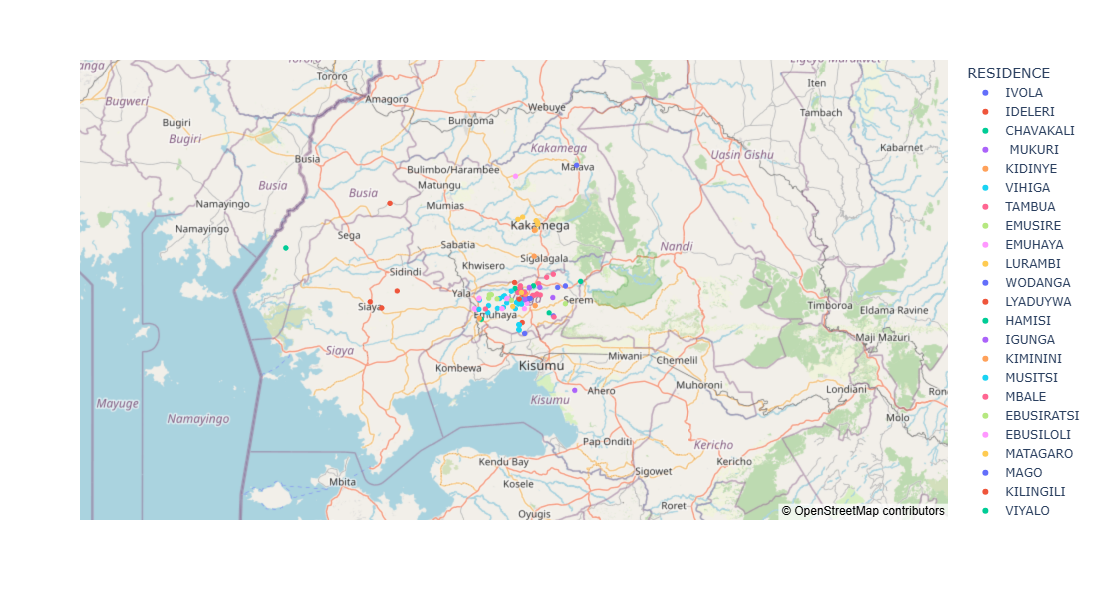

In [186]:
#create a scatter mapbox for age of the patients and where they come from
fig=px.scatter_mapbox(
   surg_null,
    lat='lat',
    lon='lon',
    width= 600,
    height=600,
    color='RESIDENCE',
    zoom=8

)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

### Despite having reduced the number of sampled patients from 160 to 108 (due to lack of residence) the map shows that most of the patients hailed from vihiga and emuhaya subcounties.Also note that a good number came from the neighboring county of kakamega.Interestingly some patients came from as far as Siaya,Busia and Ahero in Kisumu.

C:\Users\user\AppData\Local\Temp\ipykernel_33364\2290734197.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



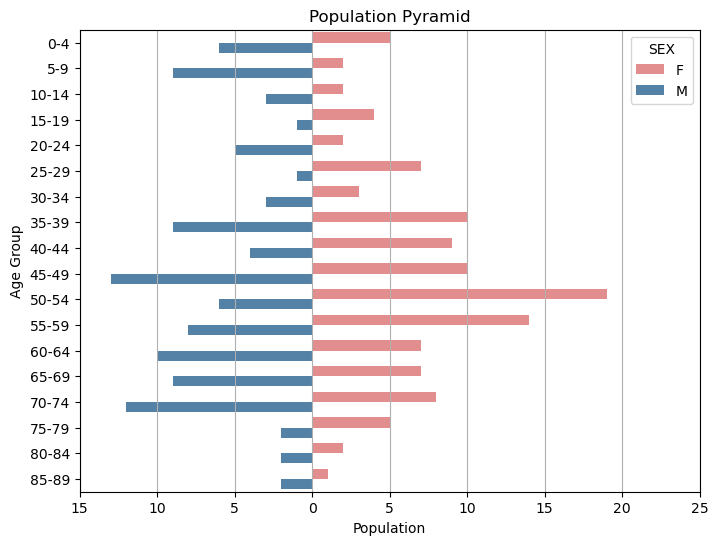

''

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create age groups (5-year intervals)
bins = range(0, int(df['AGE'].max()) + 5, 5)
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df['AgeGroup'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# 2. Count by age group and sex
pop_data = df.groupby(['AgeGroup', 'SEX']).size().reset_index(name='Population')

# 3. Make males negative for left side
pop_data.loc[pop_data['SEX'] == 'M', 'Population'] *= -1

# 4. Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=pop_data,
    y='AgeGroup',
    x='Population',
    hue='SEX',
    palette=['LIGHTCORAL', 'steelblue']
)

plt.title("Population Pyramid")
plt.xlabel("Population")
plt.ylabel("Age Group")

# 5. Positive labels for x-axis
xticks = plt.xticks()[0]
plt.xticks(xticks, [abs(int(x)) for x in xticks])

plt.grid(axis='x')
plt.show()
;